In [1]:
pip install plotly


In [102]:
# importing Libraries:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly as py
from plotly import tools



## Reading the Data

In [103]:
# Import Crop_Production DataSet
df = pd.read_csv(r'F:\Crop_Production_Proj\crop_production.csv')



In [104]:
# First 5 rows
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [105]:
df.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


In [106]:
# Basic Information About DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


##  Checking For Null Values

In [107]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [108]:
# Droping The NA Values
df.dropna(inplace = True)

In [109]:
df.shape

(242361, 7)

  ##                          Exploratory Data Analysis

## Checking For Correlation Between Variables

<AxesSubplot:>

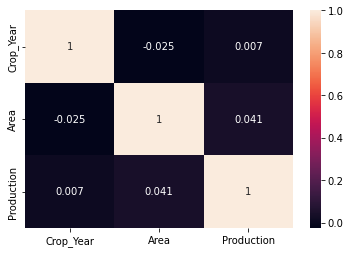

In [110]:
plt.tick_params(labelsize = 10)
sns.heatmap(df.corr(),annot = True)

## There Is No Varriable Showing High - correlation With Any other Variales In The dataset(df)

In [111]:
df.corr()

,Crop_Year,Area,Production
Crop_Year,1.000000,-0.025305,0.006989
Area,-0.025305,1.000000,0.040587
Production,0.006989,0.040587,1.000000


## Overall Production by State

In [112]:
# State wise production:
pro = df.groupby(by = 'State_Name')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(pro, 'State_Name','Production')

## Kerala is the highest crops producing state overall. It had produced morethan 500% crop than its runner up state Andhra Pradesh.

## District wise Crop Production

In [113]:
temp =df.groupby(by = 'District_Name')['Production'].sum().reset_index().sort_values('Production')


## Kozhikode  district having highest crop production

In [114]:
temp1 = temp.tail()
trace1 = px.bar(temp1, x ='District_Name',y = 'Production', title ='Highest crop production district')
trace1.show()

### MUMBAI having  the lowest crop production district

In [115]:
temp2 = temp.head()
trace2 = px.bar(temp2, x = 'District_Name',y = 'Production', title = 'Lowest Crop production District')
trace2.show()

# Yearly Crop Production:  



## * High productive years are 2011,2013 and 2014(desc)


## **Lowest productive year: 2015

In [132]:
# Yearly production:
yr = df.groupby(by ='Crop_Year')['Production'].agg(sum)
fig = px.line(yr, y = 'Production', markers = True)
fig.show()

# Area under agriculture state wise:


In [133]:
# State wise  Area of cultivation:
pro = df.groupby(by = 'State_Name')['Area'].sum().reset_index().sort_values(by = 'Area')
fig =px.bar(pro,x = 'State_Name', y = 'Area',color = 'Area')
fig.show()

#### (a) Uttar Pradesh has the larger area under agriculture
 

####  (b)followed by Madhya Pradesh and Maharastra

####  (c)Chandigarh has the lowest area under agriculture

# Area under agriculture over the years

In [134]:
Ar_y = df.groupby(by = 'Crop_Year')['Area'].mean().reset_index()
px.line(Ar_y,'Crop_Year','Area', markers = True,title = 'Area under agriculture by Year' )


####  As we can see by the year the area  under Agriculture is  coming down gradually

# Seasonal Production In India

In [135]:
# Seasonal crop production:
spro = df.groupby(by = 'Season')['Production'].sum()
fig = px.bar(spro)
fig.show()

####  We can see that most of production India are crops that can be grow Whole Year

# Top Crops That  Are Produced In India:

In [136]:
tcp = df.groupby(by = 'Crop')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(tcp.tail(5),'Crop','Production', color = 'Production')

#### Coconut has the highest production and least is Potato

# Crop Types cultivated in India

In [137]:
def cat_crop(crop):
    for i in ["Rice", "Maize", "Wheat", "Barley", "Varaga", "Other Cereals & Millets", "Ragi", "Small millets", "Bajra", "Jowar"]:
        if crop==i:
            return "Cereal"

    for i in ["Moong", "Urad", "Arhar/Tur", "Peas & beans", "Masoor","Other Kharif pulses", "Other misc.pulses",
          "Ricebean (nagadal)", "Rajmash Kholar", "Lentil", "Samai", "Blackgram", "Korra", "Cowpea(Lobia)",
          "Other Rabi pulses", "Other Kharif pulses", "Peas & beans (Pulses)","Pulses total", "Gram"]:
        if crop==i:
            return "Pulses"
    for i in ["Peach", "Apple", "Litchi","Pear", "Plums", "Ber", "Sapota", "Lemon", "Pome Granet",
              "Other Citrus Fruit", "Water Melon", "Jack Fruit", "Grapes", "Pineapple", "Orange",
              "Pome Fruit", "Citrus Fruit", "Other Fresh Fruits", "Mango", "Papaya", "Coconut", "Banana" ]:
        if crop==i:
            return "Fruits"
    for i in ["Bean", "Lab-Lab", "Moth", "Guar seed", "Soyabean", "Horse-gram"]:
        if crop==i:
            return "Bean"
    for i in ["Turnip", "Peas", "Beet Root", "Carrot", "Yam", "Ribed Guard", "Ash Gourd", "Pump Kin", "Radish", "Snak Guard","Bottle Gourd",
              "Bitter Gourd", "Cucumber", "Drum Stick", "Cauliflower", "Beans & Mutter(Vegetable)", "Cabbage",
              "Bhindi", "Tomato", "Brinjal", "Khesari", "Sweet potato", "Potato", "Onion", "Tapioca", "Colocosia"]:
        if crop==i:
            return "Vegetables"
    for i in ["Perilla", "Ginger", "Cardamom", "Black pepper", "Dry ginger", "Garlic","Coriander", "Turmeric", "Dry chillies","Cond-spcs other"]:
        if crop==i:
            return "Spices"
    for i in ["Other fibres", "Kapas", "Jute & mesta", "Jute", "Mesta", "Cotton(lint)","Sannhamp" ]:
        if crop==i:
            return "Fibres"
    for i in ["Arcanut (Processed)", "Atcanut (Raw)", "Cashewnut Processed", "Cashewnut Raw","Cashewnut", "Arecanut","Groundnut"]:
        if crop==i:
            return "Nuts"
    for i in ["other oilseeds","Safflower","Niger seed","Castor seed","Linseed","Sunflower","Rapeseed &Mustard","Sesamum","Oilseeds total"]:
        if crop==i:
            return "oilseeds"
    for i in ["Tobacco","Coffee","Tea","Sugarcane","Rubber"]:
        if crop==i:
            return "Commercial"


In [138]:
crops = df['Crop']
df['cat_crop'] = df['Crop'].apply(cat_crop)

In [139]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Nuts
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Cereal
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Fruits
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Nuts


In [140]:
df1 =df.groupby(by='cat_crop')['Production'].agg('count')
fig = px.bar(df1,y='Production',title = 'Crop wise production in India')
fig.show()

#### Top Crop categories are Cereal, Pulses and Oilseeds

#  Different Portion of Crop Categories for India

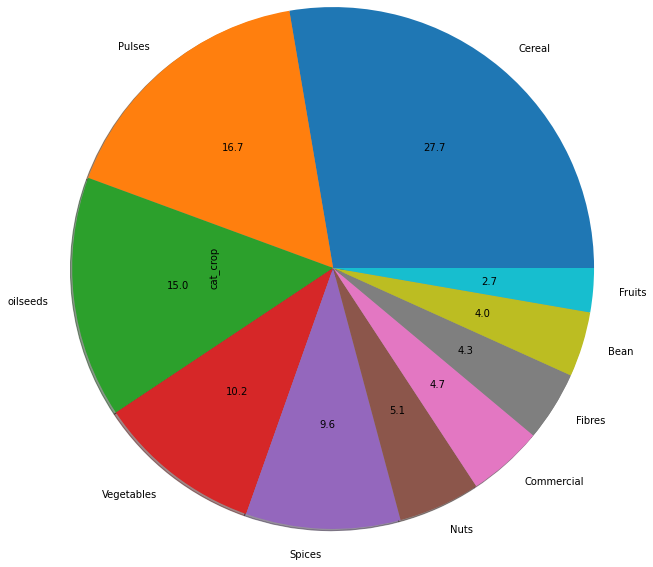

In [141]:
df2 = df['cat_crop'].value_counts()
df2.plot(radius = 3, kind = 'pie',autopct = '%1.1f',pctdistance = 0.6, shadow = True)
plt.tick_params(labelsize =10)

In [142]:
temp3 = df.groupby(by = 'Crop_Year')['Area'].mean().reset_index()
temp4 = df.groupby(by = 'Crop_Year')['Production'].sum().reset_index()
df2 = pd.merge(temp3,temp4,right_index = True,left_index = True)

In [143]:
df2.head()

,Crop_Year_x,Area,Crop_Year_y,Production
0,1997,26038.324081,1997,8.512329e+08
1,1998,14795.911383,1998,5.825321e+09
2,1999,12749.174021,1999,6.434666e+09
3,2000,12195.811997,2000,7.449709e+09
4,2001,12434.568019,2001,7.465541e+09


# Rice

In [144]:
rice_df2 = df[df['Crop'] == 'Rice']
rice_df2

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,Cereal
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,Cereal
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,Cereal
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,Cereal
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,Cereal
...,...,...,...,...,...,...,...,...
246049,West Bengal,PURULIA,2013,Summer,Rice,516.00,1274.00,Cereal
246052,West Bengal,PURULIA,2013,Winter,Rice,302274.00,730136.00,Cereal
246058,West Bengal,PURULIA,2014,Autumn,Rice,264.00,721.00,Cereal
246086,West Bengal,PURULIA,2014,Summer,Rice,306.00,801.00,Cereal


###  Rice is  a Cereal crop

<AxesSubplot:xlabel='Season', ylabel='Production'>

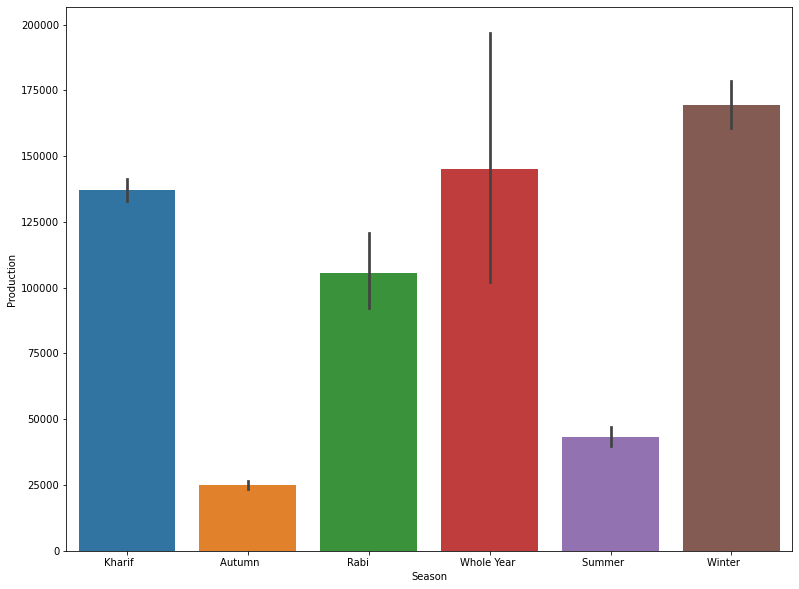

In [145]:
# Rice Production:

plt.figure(figsize = (13,10))
sns.barplot( x ='Season', y = 'Production', data = rice_df2)

###   Rice production is high in Winter Season.

###  Rice Production is very low in Autumn Season.

<AxesSubplot:xlabel='State_Name', ylabel='Production'>

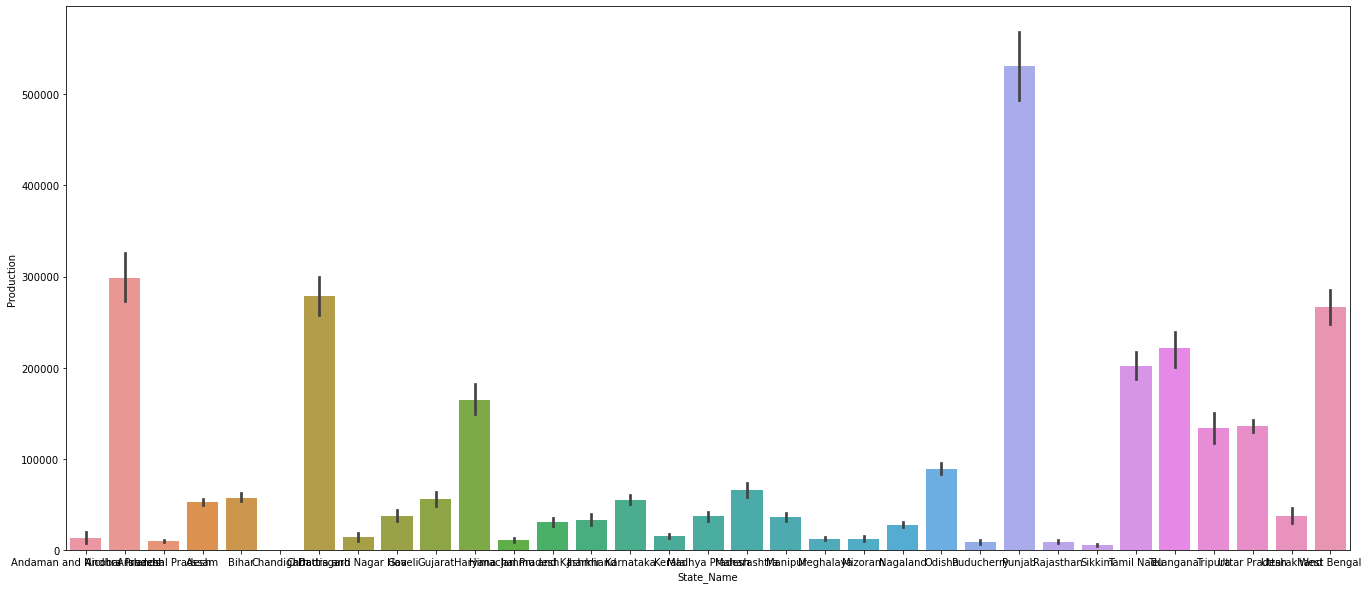

In [146]:
# State wise  Rice Production:

plt.figure(figsize = (23,10))
sns.barplot(x = 'State_Name', y = 'Production', data = rice_df2)

###  Punjab is  the Largest  Rice producing State

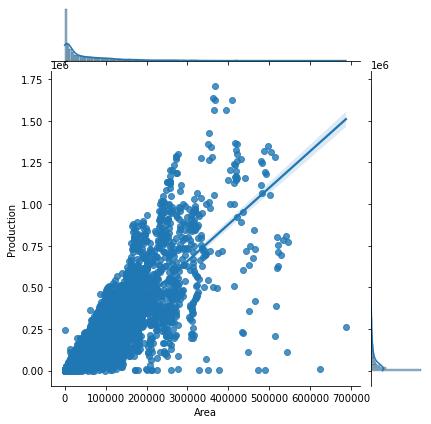

In [147]:
# Area - Wise Rice Production:

sns.jointplot(x = 'Area' , y = 'Production', data = rice_df2, kind = 'reg')
plt.show()

<AxesSubplot:xlabel='Crop_Year', ylabel='Production'>

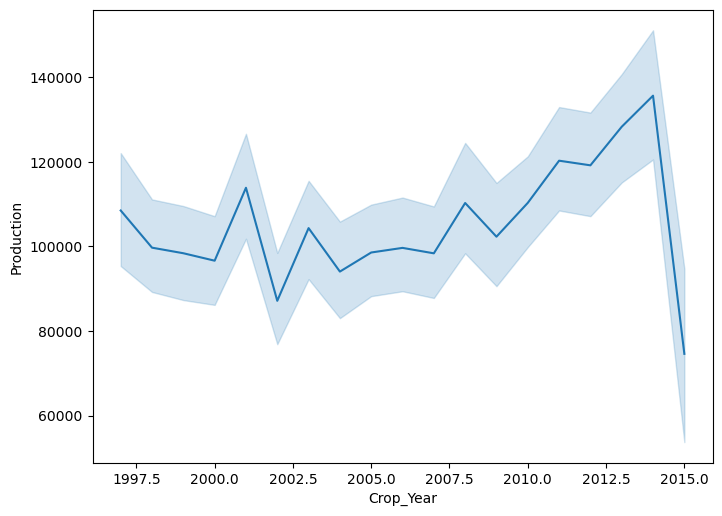

In [148]:
#  Rice Production Over the Years:

plt.figure(figsize = (8,6),dpi = 100)
sns.lineplot(data = rice_df2, x = 'Crop_Year', y = 'Production')

### There is increasing Rice Production in  Period of 2012 - 2014

#  Insight

####  From Data Visualization: Rice production is mostly depends on Season, Area, State(place).

#  Apple

In [149]:
grape_df2 = df[df["Crop"] == "Grapes"]
grape_df2

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
425,Andhra Pradesh,ANANTAPUR,2002,Whole Year,Grapes,111.0,2075.0,Fruits
482,Andhra Pradesh,ANANTAPUR,2003,Whole Year,Grapes,118.0,2048.0,Fruits
807,Andhra Pradesh,ANANTAPUR,2012,Kharif,Grapes,238.0,7606.0,Fruits
866,Andhra Pradesh,ANANTAPUR,2013,Kharif,Grapes,247.0,5644.0,Fruits
937,Andhra Pradesh,ANANTAPUR,2014,Kharif,Grapes,309.0,6886.0,Fruits
...,...,...,...,...,...,...,...,...
194008,Telangana,MEDAK,2003,Whole Year,Grapes,141.0,2691.0,Fruits
194643,Telangana,NALGONDA,2003,Whole Year,Grapes,14.0,267.0,Fruits
195168,Telangana,NIZAMABAD,2002,Whole Year,Grapes,2.0,39.0,Fruits
195822,Telangana,RANGAREDDI,2002,Whole Year,Grapes,1339.0,25788.0,Fruits


### Apple belongs  to Fruits category_crop

<AxesSubplot:xlabel='Season', ylabel='Production'>

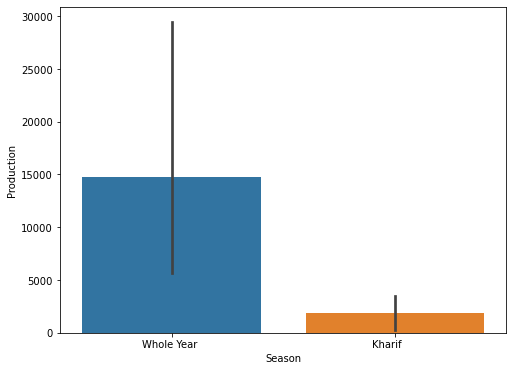

In [150]:
# Seasonal Apple Production:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Season', y = 'Production' , data = grape_df2)

### Apple production is well in Whole Year

###  In Kharif Season  Production of Apple  is low (When comparing to other seasons)

# Grapes

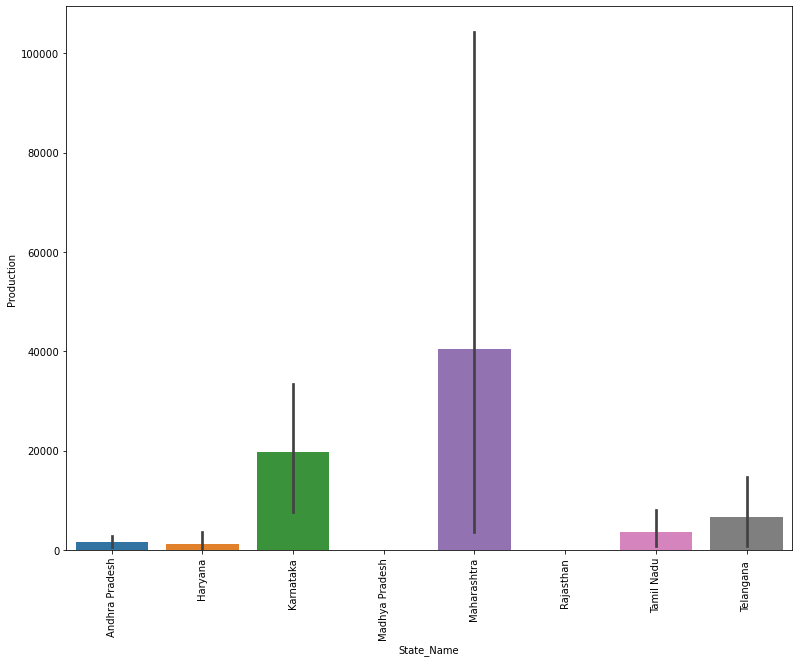

In [151]:
# State wise Grapes Production:
plt.figure(figsize = (13,10))
sns.barplot(x = 'State_Name', y = 'Production', data = grape_df2)
plt.xticks(rotation = 90)
plt.show()

### ..Maharastra State is the largest producer of Grapes

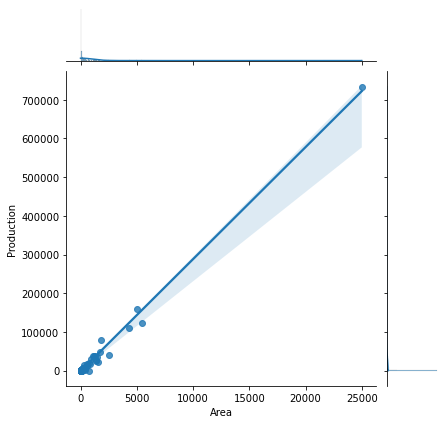

In [152]:
# Area - Wise Grapes Production:

sns.jointplot(x = 'Area' , y = 'Production', data = grape_df2, kind = 'reg')
plt.show()

<AxesSubplot:xlabel='Crop_Year', ylabel='Production'>

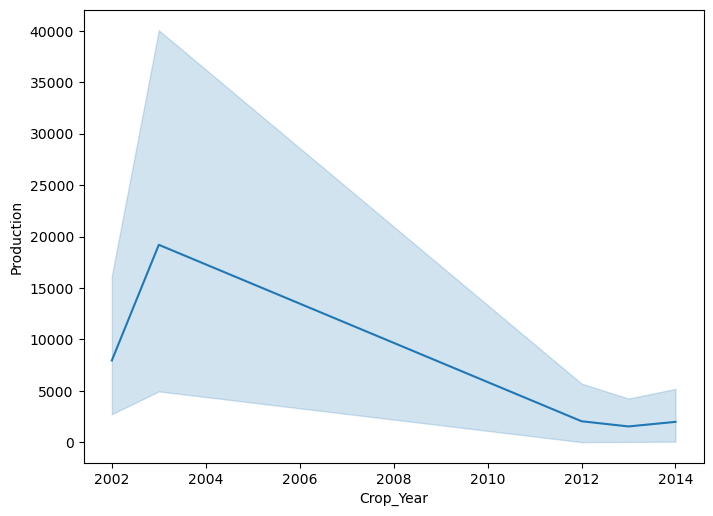

In [153]:
#  Grapes Production Over the Years:

plt.figure(figsize = (8,6),dpi = 100)
sns.lineplot(data = grape_df2, x = 'Crop_Year', y = 'Production')

###  Production Grapes is high in 2004 and after that production is decresing gradually .

# SugarCane

In [154]:
sug_df2 = df[df['Crop'] == 'Sugarcane']
sug_df2

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.00,Commercial
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.00,Commercial
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.0,40.00,Commercial
60,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Sugarcane,0.2,0.50,Commercial
65,Andaman and Nicobar Islands,NICOBARS,2010,Autumn,Sugarcane,13.4,41.75,Commercial
...,...,...,...,...,...,...,...,...
245953,West Bengal,PURULIA,2010,Whole Year,Sugarcane,303.0,11541.00,Commercial
245984,West Bengal,PURULIA,2011,Whole Year,Sugarcane,303.0,20264.00,Commercial
246016,West Bengal,PURULIA,2012,Whole Year,Sugarcane,314.0,11199.00,Commercial
246051,West Bengal,PURULIA,2013,Whole Year,Sugarcane,161.0,7948.00,Commercial


### Sugarcane is a commercial crop

<AxesSubplot:xlabel='Season', ylabel='Production'>

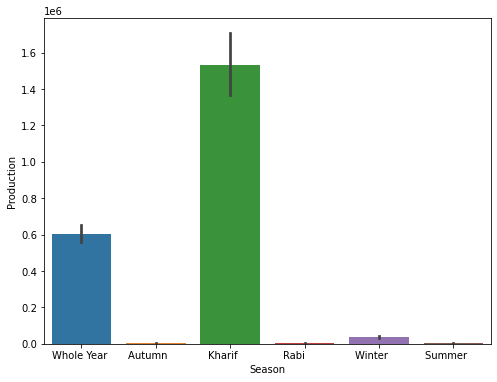

In [155]:
# Seasonal Sugarcane Production:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Season', y = 'Production' , data = sug_df2)

### The  production of Sugarcane is high in 'Kharif' Season & very low in Autumn,Rabi,Summer.

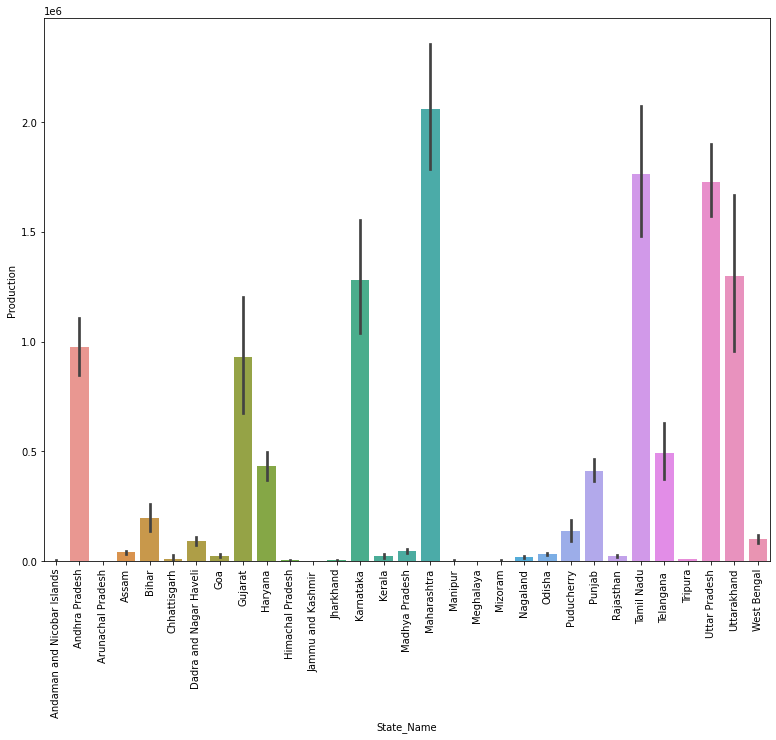

In [156]:
# State wise Sugarcane Production:
plt.figure(figsize = (13,10))
sns.barplot(x = 'State_Name', y = 'Production', data = sug_df2)
plt.xticks(rotation = 90)
plt.show()

### Maharastra State is the largest producer of Sugarcane

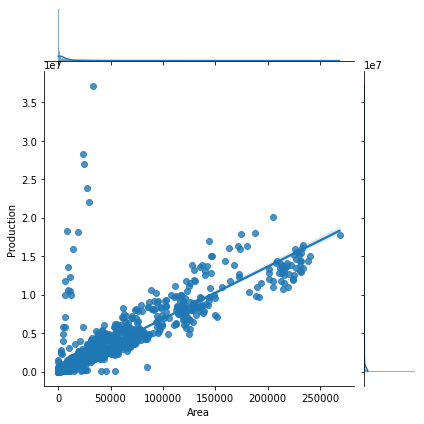

In [157]:
# Area - Wise Sugarcane Production:

sns.jointplot(x = 'Area' , y = 'Production', data = sug_df2, kind = 'reg')
plt.show()

<AxesSubplot:xlabel='Crop_Year', ylabel='Production'>

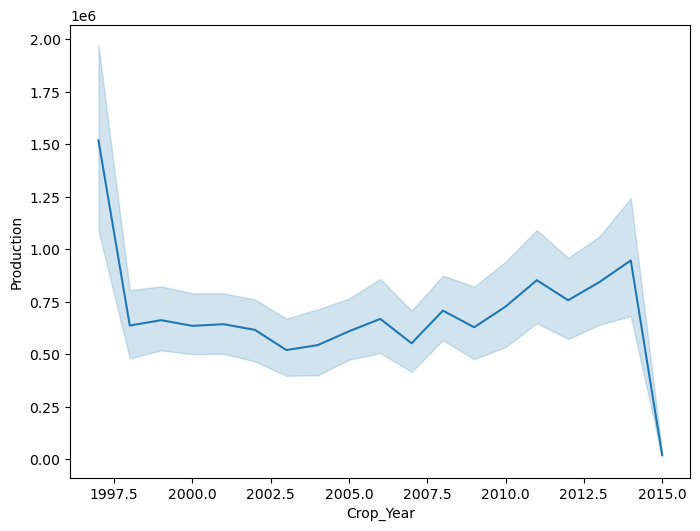

In [158]:
#  Sugarcane Production Over the Year:

plt.figure(figsize = (8,6),dpi = 100)
sns.lineplot(data = sug_df2, x = 'Crop_Year', y = 'Production')

###  Sugarcane production is peaks at 1997 over the all years

# Insight From Sugarcane Production:

### (a) Sugarcane production is directly proportional to area

###   (b) The production is high in some states only

###   (c) Production is Decresing over the year.

# Coconut

In [159]:
coc_df2 = df[df['Crop'] == 'Coconut ']
coc_df2

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.00,65100000.0,None
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.00,64430000.0,None
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.00,67490000.0,None
32,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Coconut,18284.74,68580000.0,None
41,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Coconut,18394.70,52380000.0,None
...,...,...,...,...,...,...,...,...
245719,West Bengal,PURULIA,2004,Whole Year,Coconut,66.00,296.1,None
245756,West Bengal,PURULIA,2005,Whole Year,Coconut,74.00,311.0,None
245792,West Bengal,PURULIA,2006,Whole Year,Coconut,73.00,365000.0,None
245837,West Bengal,PURULIA,2007,Whole Year,Coconut,58.00,898000.0,None


<AxesSubplot:xlabel='Season', ylabel='Production'>

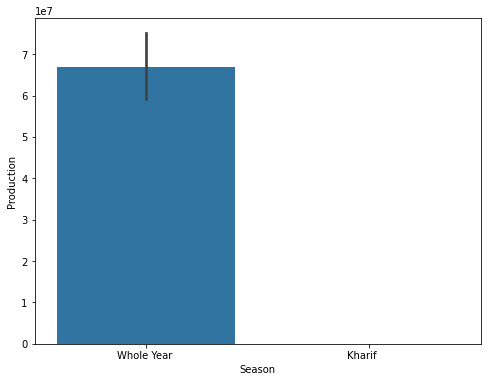

In [160]:
# Seasonal Coconut Production:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Season', y = 'Production' , data = coc_df2)

###  .Season for production of  Coconut  crop is Whole Year.

<AxesSubplot:xlabel='Crop_Year', ylabel='Production'>

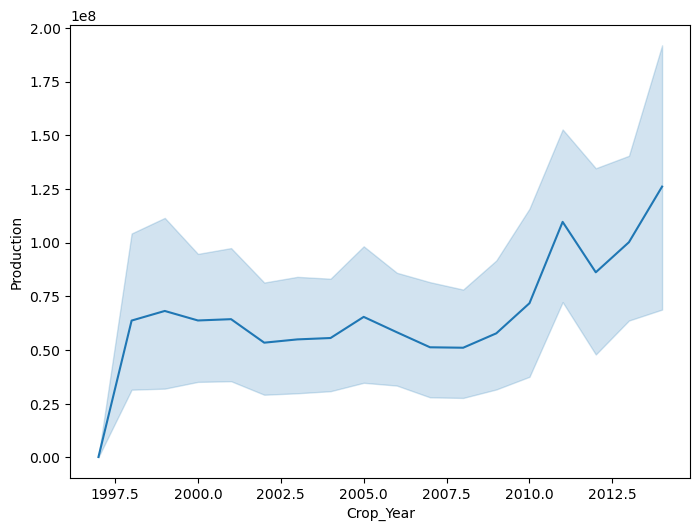

In [161]:
#  Coconut Production Over the Year:

plt.figure(figsize = (8,6),dpi = 100)
sns.lineplot(data = coc_df2, x = 'Crop_Year', y = 'Production')

### . Coconut production gradually increasing  from 2012

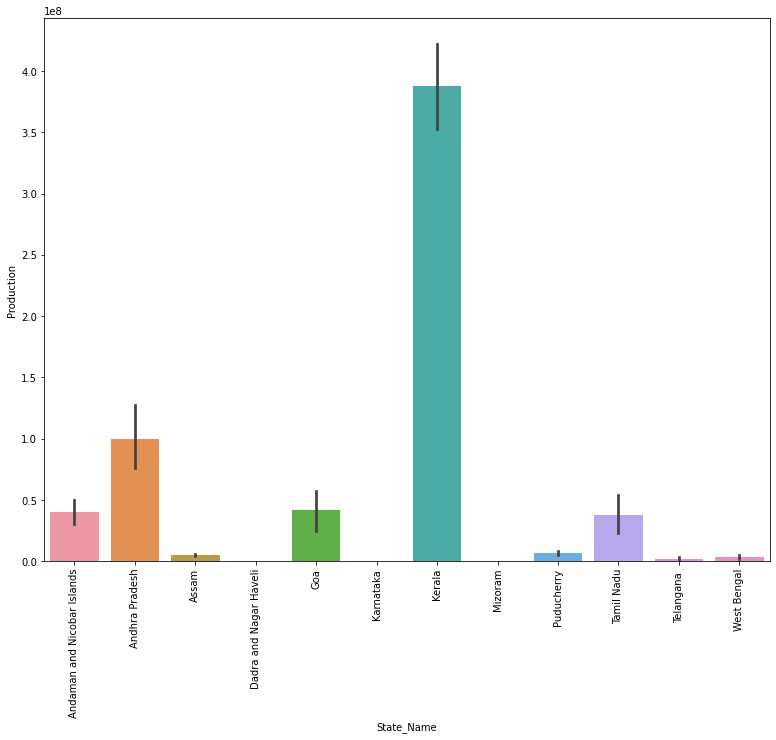

In [162]:
# State wise Coconut Production:
plt.figure(figsize = (13,10))
sns.barplot(x = 'State_Name', y = 'Production', data = coc_df2)
plt.xticks(rotation = 90)
plt.show()

###  (a) Kerala is the Largest Coconut producing State In India

###  (b) After Kerala larger coconut producer states are  Andhra Pradesh,Goa,Tamil Nadu,Andaman and Nicobar Islands

###  (c) Almost zero Coconut production in  Chattisgarh,Mizoram.

# Potato

In [163]:
po_df2 = df[df['Crop'] == 'Potato']
po_df2

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
331,Andhra Pradesh,ANANTAPUR,2000,Whole Year,Potato,4.0,34.0,Vegetables
433,Andhra Pradesh,ANANTAPUR,2002,Whole Year,Potato,2.0,17.0,Vegetables
530,Andhra Pradesh,ANANTAPUR,2004,Whole Year,Potato,2.0,20.0,Vegetables
745,Andhra Pradesh,ANANTAPUR,2010,Whole Year,Potato,21.0,236.0,Vegetables
792,Andhra Pradesh,ANANTAPUR,2011,Whole Year,Potato,18.0,181.0,Vegetables
...,...,...,...,...,...,...,...,...
245945,West Bengal,PURULIA,2010,Rabi,Potato,977.0,15920.0,Vegetables
245976,West Bengal,PURULIA,2011,Rabi,Potato,1077.0,17412.0,Vegetables
246008,West Bengal,PURULIA,2012,Rabi,Potato,913.0,17203.0,Vegetables
246043,West Bengal,PURULIA,2013,Rabi,Potato,1726.0,43703.0,Vegetables


<AxesSubplot:xlabel='Season', ylabel='Production'>

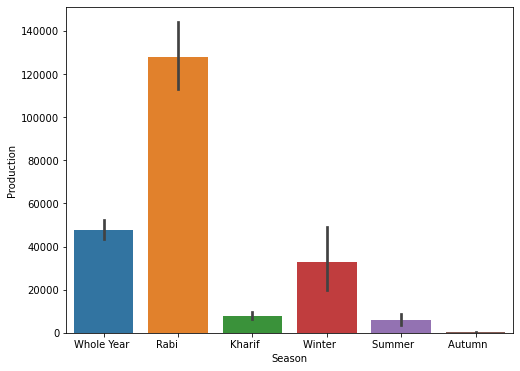

In [164]:
# Seasonal Potato Production:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Season', y = 'Production' , data = po_df2)

###  (a) Production of Potato is very high in Rabi Season

### (b) Production of Potato is very low in Autumn Season

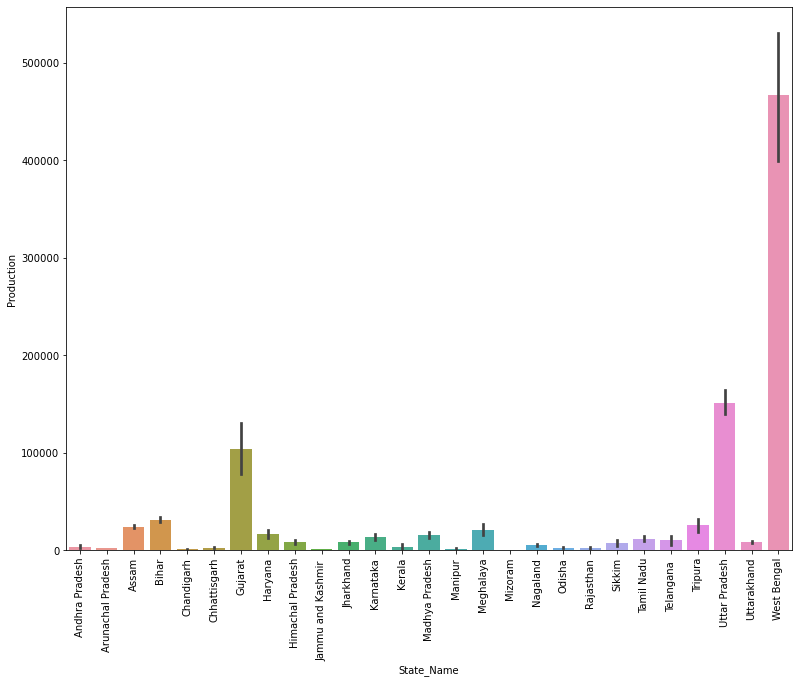

In [165]:
# State wise Potato Production:
plt.figure(figsize = (13,10))
sns.barplot(x = 'State_Name', y = 'Production', data = po_df2)
plt.xticks(rotation = 90)
plt.show()

## West Bengal, Uttar Pradesh & Gujarat are largest Potato producers states

# Applying Some Regression model to predict Production:

In [166]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'cat_crop'],
      dtype='object')

In [167]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Nuts
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Cereal
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Fruits
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Nuts


# Label Encoding

In [168]:
encoder = LabelEncoder()

df['State_Name'] = encoder.fit_transform(df['State_Name'])
df['District_Name'] = encoder.fit_transform(df['District_Name'])
df['Crop'] = encoder.fit_transform(df['Crop'])
df['Season'] = encoder.fit_transform(df['Season'])
df['cat_crop'] = encoder.fit_transform(df['cat_crop'])

<IPython.core.display.Javascript object>

In [169]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
0,0,427,2000,1,2,1254.0,2000.0,5
1,0,427,2000,1,74,2.0,1.0,6
2,0,427,2000,1,95,102.0,321.0,1
3,0,427,2000,4,7,176.0,641.0,4
4,0,427,2000,4,22,720.0,165.0,5


In [170]:
# Extracting Dependant And Independant Variables
X = df.drop(columns = 'Production', axis = 1)
Y = df['Production']

In [171]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [172]:
# Shape of the Train and Test Set.
print("X_train :", X_train.shape)
print("X_test :",  X_test.shape)
print("Y_train :", Y_train.shape)
print("Y_test :",  Y_test.shape)

X_train : (169652, 7)
X_test : (72709, 7)
Y_train : (169652,)
Y_test : (72709,)


#  Training The Model :Linear Regression

In [173]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,Y_train)

LinearRegression()

# EVALUATION



In [174]:
Y_pred = lr_model.predict(X_test)
from sklearn.metrics import r2_score
lr_R2 = r2_score(Y_test,Y_pred)
print("R2 score when  using Linear Regression  Model is ",lr_R2)

R2 score when  using Linear Regression  Model is  0.007591234276235648


# Training The Model : Decision Tree

In [175]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
dt_model.fit(X_train,Y_train)

DecisionTreeRegressor()

# EVALUATION

In [179]:
Y_pred = dt_model.predict(X_test)
from sklearn.metrics import r2_score
dt_R2 = r2_score(Y_test,Y_pred)
print("R2 score when  using Decision Tree Model is ",dt_R2)

R2 score when  using Decision Tree Model is  0.9789954410389647


# Training The Model: Random Forest

In [180]:
from sklearn.ensemble import RandomForestRegressor
rf_model= RandomForestRegressor()
rf_model.fit(X_train,Y_train)

RandomForestRegressor()

# EVALUATION

In [181]:
Y_pred = rf_model.predict(X_test)
from sklearn.metrics import r2_score
rf_R2 = r2_score(Y_test,Y_pred)
print("R2 score when  using Random Forest Model is ",rf_R2)

R2 score when  using Random Forest Model is  0.9674236680043891


In [183]:
# R2 score of Linear Regression, Decision Tree and Random Forest:
print("R2 score when  using Linear Regression  Model is ",lr_R2)
print("R2 score when  using Random Forest Model is ", rf_R2)
print("R2 score when  using Decision Tree Model is ", dt_R2)

R2 score when  using Linear Regression  Model is  0.007591234276235648
R2 score when  using Random Forest Model is  0.9674236680043891
R2 score when  using Decision Tree Model is  0.9789954410389647


# Conclusion:


## We have fitted three ML algorithms Linear regression,  Decision Tree  and Random Forest but Decision Tree has the high R2 score as compared to other model.So We Can consider 'Decision Tree' as a best model to prediction  for this data.